This notebook generates all the figures shown in the paper, and some of the simple numerical calculations

In [2]:
import numpy as np
import pickle, time, copy
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
colors = list(mcolors.TABLEAU_COLORS)
import os.path
from numpy.random import default_rng
rng = default_rng()

# Figure: the principles of the Full RSB assumption

Text(0.275, 0.75, "$\\rho(q) = x_m \\delta(q-q_m) + (1-x_M) \\delta(q - q_M) + x'(q)$")

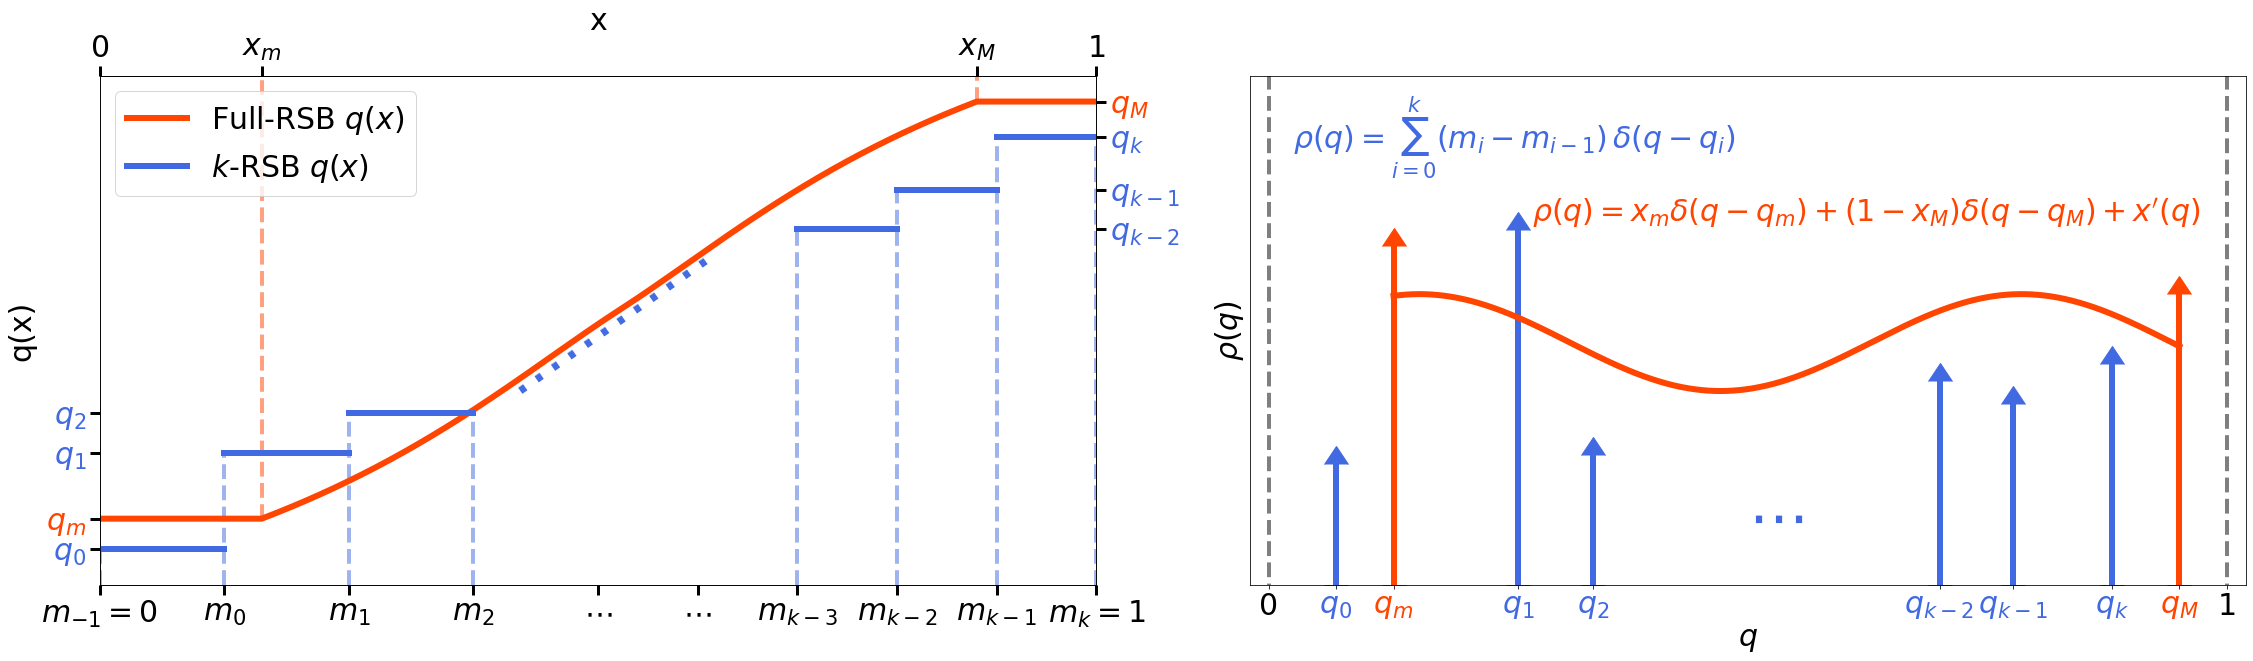

In [2]:
scale = 2

plt.rcParams.update({'font.size': 15*scale})
width = 8*scale
height = width / ((np.sqrt(5.)+1)/2.) #Golden ratio
fig, axes = plt.subplots(1,2,figsize=(2*width,height))
linewidth = 3*scale
linewidth_dot = 2*scale
color_rsb = "royalblue"
color_frsb = "orangered"

#Reverse the figure
axes = np.flip(axes)


ax = axes[0]
ax.set_xlim(-0.02,1.02)
ax.set_ylim(0.0, 1.05)
ax.set_yticks([])
ax.set_xlabel(r'$q$')
ax.set_ylabel(r'$\rho(q)$')

ax.plot([1,1],[-1,2],linestyle='--',color='black',zorder=0,linewidth=linewidth_dot,alpha=0.5)
ax.plot([0,0],[-1,2],linestyle='--',color='black',zorder=0,linewidth=linewidth_dot,alpha=0.5)
ax.set_xticks([0,1])


ax = axes[1]
ticks = []
dic = {0:r"$m_{-1} = 0$", 1:r"$m_k = 1$"}
k = 4
for i in range(k-1):
    dic[(i+1)*0.5/k] = r"$m_{0}$".format(i)
dic[0.5] = r"$\cdots$"
dic[0.6] = r"$\cdots$"
for i in range(k-1):
    dic[0.6 + (i+1)*0.4/k] = r"$m_{k-"+str(k-1-i)+"}$"

ticks = np.array([x for x in dic])
labels = [dic[x] for x in dic]
ax.set_xticks(ticks)
ax.set_xticklabels(labels)
ax.tick_params(direction='out', length=5*scale, width=1.5*scale)

xmin = ticks[2]*1.3
xmax = ticks[-2]*1.1
qmin = 0.13
qmax = 0.95

def f0(x): #A function from [0,1] to [0,1], strictly increasing
    if x < 0.5:
        return np.tanh(x/(1.-x))/(2*np.tanh(1.))
    else:
        return 1-f0(1.-x)

def q(x):
    if x < xmin:
        return qmin
    elif x > xmax:
        return qmax
    else:
        return qmin + (qmax-qmin)*f0((x-xmin)/(xmax-xmin))


#Put the finite-RSB curve
qs_rsb = np.zeros(k-1)
ms = np.concatenate(([ticks[0]],ticks[2:k+1]))
for i in range(k-1):
    qs_rsb[i] = 0.07 + 0.6*(i/10)**0.5
    ax.plot([ms[i], ms[i+1]], [qs_rsb[i],qs_rsb[i]], color = color_rsb, linewidth = linewidth, zorder  = 5)
    ax.plot([ms[i], ms[i]], [0, qs_rsb[i]], '--', color=color_rsb,zorder=0,linewidth=linewidth_dot,alpha=0.5)
    if i == k-2:
        ax.plot([ms[i+1], ms[i+1]], [0, qs_rsb[i]], '--', color=color_rsb,zorder=0,linewidth=linewidth_dot,alpha=0.5)

#A vectors of size (k-1) for the heights, we put them random with total weight 1/2 for each side (even if not coherent with the right plot, this is for illustration)
heights = rng.uniform(0.2, 0.8, k-1)
heights /= (0.8)*np.sum(heights)

ax = axes[0]
for i in range(k-1):
    ax.errorbar(qs_rsb[i],0.,yerr= heights[i], color=color_rsb,uplims=False,lolims=True, elinewidth=linewidth, capsize = 6*scale)
    
ax = axes[1]
qs_rsb_2 = np.zeros(k-1)
ms = np.concatenate((ticks[-k+1:],[ticks[1]]))
for i in range(k-1):
    qs_rsb_2[i] = 0.88 - 0.375*((k-2-i)/5)**0.8
    ax.plot([ms[i], ms[i+1]], [qs_rsb_2[i],qs_rsb_2[i]], color = color_rsb, linewidth = linewidth, zorder  = 5)
    ax.plot([ms[i], ms[i]], [0, qs_rsb_2[i]], '--', color=color_rsb,zorder=0,linewidth=linewidth_dot,alpha=0.5)
    if i == k-2:
        ax.plot([ms[i+1], ms[i+1]], [0, qs_rsb_2[i]], '--', color=color_rsb,zorder=0,linewidth=linewidth_dot,alpha=0.5)

heights = rng.uniform(0.2, 0.8, k-1)
heights /= (0.8)*np.sum(heights)

ax = axes[0]
for i in range(k-1):
    ax.errorbar(qs_rsb_2[i],0.,yerr= heights[i], color=color_rsb,uplims=False,lolims=True, elinewidth=linewidth, capsize = 6*scale)
    
ax.set_xticks(np.concatenate((qs_rsb,qs_rsb_2, [q(xmin),q(xmax),0,1])))
ax.set_xticklabels(np.concatenate(([r'$q_{0}$'.format(i) for i in range(k-1)], [r'$q_{k-'+str(k-1-i)+'}$' for i in range(1,k-1)], [r'$q_k$',r'$q_m$',r'$q_M$',0,1])), color = color_rsb)
#Change the color of the FRSB ticks
for ticklabel in ax.get_xticklabels():
    if ticklabel.get_text() in [r'$q_m$',r'$q_M$']:
        ticklabel.set_color(color_frsb)
    if ticklabel.get_text() in ['0','1']:
        ticklabel.set_color('black')


ax.text(0.5,0.1, r'$\cdots$', color = color_rsb,fontsize=30*scale)

ax = axes[1]
#Put an axis on top for the f-RSB curve, with a different color, and dotted lines to show xmin and xmax

secax = ax.secondary_xaxis('top')
secax.set_xlabel(r'x')
ticks = []
dic = {0:r"$0$", 1:r"$1$", xmin:r"$x_m$", xmax:r"$x_M$"}
xs = np.linspace(0, 1, num = 1000)
qs = np.array([q(x) for x in xs])

ax.plot(xs, qs,linestyle='-',color=color_frsb,linewidth=linewidth, label = r'Full-RSB $q(x)$')
ax.plot([xmin, xmin], [q(xmin), 10], '--', color=color_frsb,zorder=0,linewidth=linewidth_dot,alpha=0.5)
ax.plot([xmax, xmax], [q(xmax), 10], '--', color=color_frsb,zorder=0,linewidth=linewidth_dot,alpha=0.5)

ax = axes[0]
f2 = lambda x: 0.5+0.1*np.sin(10*x)

qs_2 = np.linspace(qmin, qmax, num = 1000)
Pq_2 = np.array([f2(x) for x in qs_2])
ax.plot(qs_2, Pq_2 ,linestyle='-',color=color_frsb,linewidth=linewidth)

ax = axes[1]
ticks = np.array([x for x in dic])
labels = [dic[x] for x in dic]
secax.set_xticks(ticks)
secax.set_xticklabels(labels)
secax.tick_params(direction='out', length=5*scale, width=1.5*scale)

yticks = np.concatenate((qs_rsb, [q(xmin)]))
ytickslabels = np.concatenate(([r'$q_{0}$'.format(i) for i in range(k-1)], [r'$q_m$']))
ax.set_yticks(yticks)
ax.set_yticklabels(ytickslabels)
for t in ax.yaxis.get_ticklabels():
    if t.get_unitless_position()[1] in qs_rsb:
        t.set_color(color_rsb)
    else:
        t.set_color(color_frsb)
        
ax2 = ax.twinx()
yticks = np.concatenate((qs_rsb_2, [q(xmax)]))
ytickslabels = np.concatenate(([r"$q_{k-"+str(k-2-i)+"}$" for i in range(k-2)],[r"$q_k$"], [r'$q_M$']))
ax2.set_yticks(yticks)
ax2.set_yticklabels(ytickslabels)
ax2.tick_params(direction='out', length=5*scale, width=1.5*scale)
for t in ax2.yaxis.get_ticklabels():
    if t.get_unitless_position()[1] in qs_rsb_2:
        t.set_color(color_rsb)
    else:
        t.set_color(color_frsb)

ax.text(0.4, 0.35, r'$\cdots\cdots\cdots\cdots$', color = color_rsb, rotation=35, fontsize = 30*scale, zorder = 0)
ax.set_xlim(0.,1.0)
ax.set_ylim(0, 1.0)
ax.set_ylabel(r'q(x)', labelpad = 10)
plt.tight_layout()

ax.plot([-1,-1],[-2,-1],linestyle='-',color=color_rsb,linewidth=linewidth, label = r'$k$-RSB $q(x)$')
ax.legend(fancybox=True,loc='upper left')

ax = axes[0]

ax.errorbar(qmin,0.,yerr= 0.7, color=color_frsb,uplims=False,lolims=True, elinewidth=linewidth, capsize = 6*scale)
ax.errorbar(qmax,0.,yerr= 0.6, color=color_frsb,uplims=False,lolims=True, elinewidth=linewidth, capsize = 6*scale)
ax.text(0.025,0.9, r'$\rho(q) = \sum_{i=0}^k (m_i - m_{i-1}) \, \delta(q-q_i)$', color = color_rsb)
ax.text(0.275,0.75, r"$\rho(q) = x_m \delta(q-q_m) + (1-x_M) \delta(q - q_M) + x'(q)$", color = color_frsb)

#plt.savefig('../figures/q_frsb.pdf', bbox_inches='tight')

# Shift maximum - minimum in the RS potential

In [3]:
#This is the RS potential for a given r > 0

from scipy import special
from scipy import integrate

def integrand(xi, beta, r, q):
    inner1 = np.sqrt(1.-q)*np.exp(q*xi**2/(2*(1 - q*(1-r))))*special.erfc(xi*np.sqrt(q / (2*(1 - q*(1-r))) )) / 2. 
    inner2 = np.sqrt(1.-q)*np.exp(-beta+q*xi**2/(2*(1 - q*(1-r))))*(1.+special.erf(xi*np.sqrt(q / (2*(1 - q*(1-r))) ))) / 2.
    return (np.exp(-xi**2./2)/np.sqrt(2*np.pi))*(inner1 + inner2)**r

def PhiRS(alpha, beta, r, q):
    term1 = - (alpha-1)*((r-1)*np.log(1.-q) + np.log(1 + (r-1)*q)) / 2
    integral, _ = integrate.quad(integrand, -30, 30, args = (beta, r, q,))
    return term1 + alpha*np.log(integral)

In [4]:
alphac = 5.0
betac = 1.0
rs = np.linspace(1.4, 0.6, 9, endpoint=True)
qs = np.linspace(0., 0.95, 500)
phis = np.zeros((np.size(rs), np.size(qs)))
for (i_r, r) in enumerate(rs):
    phis[i_r, :] = np.array([PhiRS(alphac, betac, r, q) for q in qs])
    
phistar = np.zeros_like(rs)
for (i_r, r) in enumerate(rs):
    if r >= 1:
        phistar[i_r] = np.amax(phis[i_r])
    else:
        phistar[i_r] = np.amin(phis[i_r])

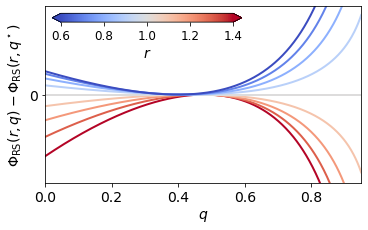

In [5]:
cmap = matplotlib.cm.get_cmap('coolwarm')
colors_map = cmap(np.linspace(1.0, 0., num = np.size(rs) , endpoint=True))
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

scale = 1
#FIXME Take a color map for colors depending on r
plt.rcParams.update({'font.size': 14*scale})
width = 5*scale
height = width / ((np.sqrt(5.)+1)/2.) #Golden ratio
#fig, axes = plt.subplots(1,np.size(rs),figsize=(np.size(rs)*width,height))
fig, ax = plt.subplots(1,1,figsize=(width,height),layout="constrained")
linewidth = 2*scale
linewidth_dot = 1.5*scale
fontsize_legend = 12*scale

#for (i_r, r) in enumerate(rs):
#    ax = axes[i_r]
ax.set_xlim(0.,0.95)
ax.set_yticks([0])
ax.set_ylim(-0.075, 0.075)
ax.set_xlabel(r'$q$')
ax.set_ylabel(r'$\Phi_\mathrm{RS}(r, q) - \Phi_\mathrm{RS}(r, q^\star)$')
ax.plot([-3,3],[0,0], '--', linewidth=linewidth_dot, zorder=0, color='black')

for (i_r, r) in enumerate(rs):
    ax.plot(qs, phis[i_r]-phistar[i_r],linestyle='-',linewidth=linewidth, label = r'$r = {0}$'.format(round(r,2)), color = colors_map[i_r])
norm = matplotlib.colors.Normalize(vmin=np.amin(rs), vmax=np.amax(rs))
cbax = inset_axes(ax, width="60%", height="5%", loc='upper left') 
cbar = fig.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbax, extend = 'both', orientation = 'horizontal')
cbar.set_label(label=r'$r$')
cbar.ax.tick_params(labelsize=fontsize_legend)
#plt.savefig('../figures/inversion_max_min_RS.pdf', bbox_inches='tight')

# Zero-temperature susceptibility and ground-state energy plot

## Loading data

In [2]:
#The RS results
filename = "Data/RS_results.pkl"
infile = open(filename,'rb')
results = pickle.load(infile)
infile.close()
alphas_RS = results['alphas_RS']
chis_RS = results['chis_RS']
estars_RS = results['estars_RS']
alphainj_RS = results['alphainj_RS']
alpha_dAT = results['alpha_dAT']

In [25]:
#The 1RSB results
filename = "Data/1RSB_scan_alpha.pkl"
infile = open(filename,'rb')
results = pickle.load(infile)
infile.close()
alphas_1RSB = results['alphas']
solutions = results['solutions']
q0s_1RSB = np.array([solutions[i_a]['q0'] for i_a in range(np.size(alphas_1RSB))])
chis_1RSB = np.array([solutions[i_a]['chi'] for i_a in range(np.size(alphas_1RSB))])
chims_1RSB = np.array([solutions[i_a]['chim'] for i_a in range(np.size(alphas_1RSB))])
estars_1RSB = np.array([solutions[i_a]['estar'] for i_a in range(np.size(alphas_1RSB))])

filename = "Data/1RSB_threshold.pkl"
infile = open(filename,'rb')
results = pickle.load(infile)
infile.close()
alphainj_1RSB = results['alphainj_1RSB']

#We computed two thresholds, using the two equivalent estimates for the ground state energy
print(f"Relative difference between the two thresholds:{np.abs(alphainj_1RSB['estar']-alphainj_1RSB['fstar'])/alphainj_1RSB['estar']}")
#Since they are the same, in the plot we show the one using the formula for estar.
alphainj_1RSB = alphainj_1RSB['estar']

Relative difference between the two thresholds:9.729699420682499e-08


In [26]:
#The full RSB results
ks = [30, 50, 100, 200]
xmaxs = [10., 15.]
Hs = [40.]
cs = [30.]

alphas, estars, chis, qs, xs = np.full((np.size(ks), np.size(xmaxs), np.size(Hs), np.size(cs)), fill_value = None), np.full((np.size(ks), np.size(xmaxs), np.size(Hs), np.size(cs)), fill_value = None), np.full((np.size(ks), np.size(xmaxs), np.size(Hs), np.size(cs)), fill_value = None), np.full((np.size(ks), np.size(xmaxs), np.size(Hs), np.size(cs)), fill_value = None), np.full((np.size(ks), np.size(xmaxs), np.size(Hs), np.size(cs)), fill_value = None)

for (i_k,k) in enumerate(ks):
    for (i_x,xmax) in enumerate(xmaxs):
        for (i_H,H) in enumerate(Hs):
            for (i_c,c) in enumerate(cs):
                filename = f"Data/scan_alpha/FRSB_T0_GPU_k_{k}_xmax_{xmax}_H_{H}_c_{c}.pkl"
                infile = open(filename,'rb')
                results = pickle.load(infile)
                infile.close()
                chis[i_k,i_x,i_H,i_c] = results['chis']
                estars[i_k,i_x,i_H,i_c] = results['estars']
                xs[i_k,i_x,i_H,i_c] = results['xs']
                qs[i_k,i_x,i_H,i_c] = results['qs']
                alphas[i_k,i_x,i_H,i_c] = results['alphas']
    
#Loading a value for the FRSB threshold. 
filename = "Data/thresholds/FRSB_T0_GPU_k_100_xmax_10.0_H_40.0_c_30.0.pkl"
infile = open(filename,'rb')
results = pickle.load(infile)
infile.close()
alphainj_FRSB = results['alphainj_FRSB']

## Making the plot

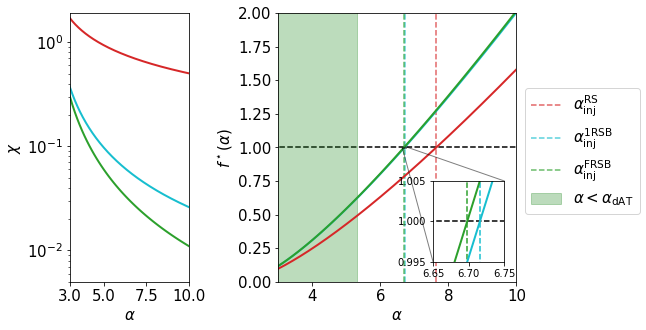

In [27]:
scale = 1
plt.rcParams.update({'font.size': 15*scale})
width = 8*scale
height = width / ((np.sqrt(5.)+1)/2.) #Golden ratio

fig, axes = plt.subplots(1, 2,figsize = (width,height),gridspec_kw={'width_ratios': [1, 2]})
ax = axes[0]
ax.set_yscale('log')
ax.plot(alphas_RS, chis_RS, label = r'RS', linewidth=2*scale, color = colors[3])
ax.plot(alphas_1RSB, chis_1RSB, label = r'$1$RSB', linewidth=2*scale, color = colors[9])
ax.set_ylabel(r'$\chi$')
ax.set_xlabel(r'$\alpha$')

#We plot k = 200, xmax = 10, H = 40, c = 30
indices_FRSB = -1, 0, 0, 0
ax.plot(alphas[indices_FRSB], chis[indices_FRSB], linewidth=2, label=r'FRSB, $k = {0}$'.format(k), markersize=5, color = colors[2])

ax.set_xlim(3, 10)
ax.set_ylim(5e-3, 1.11*np.amax(chis_RS)*1.01)
ax.set_xticks([3, 5, 7.5, 10])

ax = axes[1]
ax.plot(alphas_RS, estars_RS, linewidth=2, color = colors[3])
ax.plot(alphas_1RSB, estars_1RSB, linewidth=2, color = colors[9])
ax.plot(alphas[indices_FRSB], estars[indices_FRSB], linewidth=2, color = colors[2])
ax.set_ylim(0,2)
ax.set_xlim(3, 10)
ax.plot([0,100],[1,1], '--', linewidth=1.5, zorder=0, color='black')
ax.plot([alphainj_RS, alphainj_RS],[0,2], '--', linewidth=1.5, zorder=0, color=colors[3], alpha = 0.7, label=r'$\alpha_\mathrm{inj}^\mathrm{RS}$')
ax.plot([alphainj_1RSB,alphainj_1RSB],[0,2], '--', linewidth=1.5, zorder=0, color=colors[9], alpha = 0.7, label=r'$\alpha_\mathrm{inj}^\mathrm{1RSB}$')
ax.plot([alphainj_FRSB, alphainj_FRSB],[0,2], '--', linewidth=1.5, zorder=0, color=colors[2], alpha = 0.7, label=r'$\alpha_\mathrm{inj}^\mathrm{FRSB}$')
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$f^\star(\alpha)$')

axins = ax.inset_axes([0.65, 0.075, 0.3, 0.3])
axins.set_xlim(6.65, 6.75)
axins.set_ylim(0.995, 1.005)
axins.plot([alphainj_1RSB,alphainj_1RSB],[0,2], '--', linewidth=1.5, zorder=0, color=colors[9])
axins.plot([alphainj_FRSB, alphainj_FRSB],[0,2], '--', linewidth=1.5, zorder=0, color=colors[2])
axins.plot(alphas_1RSB, estars_1RSB, linewidth=2, color = colors[9])
axins.plot([0,100],[1,1], '--', linewidth=1.5, zorder=0, color='black')
axins.plot(alphas[indices_FRSB], estars[indices_FRSB], linewidth=2, color = colors[2])

ax.indicate_inset_zoom(axins, edgecolor="black", alpha =0.5)
ax.fill([3.,3.,alpha_dAT,alpha_dAT],[-1,3,3,-1],color='forestgreen',alpha=0.3, label = r'$\alpha < \alpha_\mathrm{dAT}$')
axins.set_yticks([0.995, 1,  1.005])
axins.tick_params(axis='x', labelsize=10)
axins.tick_params(axis='y', labelsize=10)

ax.legend(fancybox=True,loc = 'upper right', bbox_to_anchor = (1.55, 0.75), ncol = 1)

plt.subplots_adjust(wspace=0.5)
#plt.savefig('../figures/chi_estar_T0.pdf', bbox_inches='tight')

# Plot: evolution along the full RSB iterations

In [25]:
def N0(H, k, xmax):
    return H * np.sqrt(k) * xmax

def plot_chi_q(alpha, k, xmax, H, c, plot_range = 10, save = False):
    
    N = int(c*np.ceil(N0(H, k, xmax))) 
    
    #Find all the iterations present
    NB_iterations = 0
    filename = f"Data/illustration_iterations/FRSB_T0_GPU_alpha_{alpha}_k_{k}_xmax_{xmax}_H_{H}_N_{N}_iteration_{NB_iterations}.pkl"
    while os.path.isfile(filename):
        NB_iterations += 1
        filename = f"Data/illustration_iterations/FRSB_T0_GPU_alpha_{alpha}_k_{k}_xmax_{xmax}_H_{H}_N_{N}_iteration_{NB_iterations}.pkl"
    chis = np.zeros(NB_iterations)
    xs = np.zeros((NB_iterations, k+1))
    qs = np.zeros((NB_iterations, k+1))
    estars = np.zeros(NB_iterations)

    for t in range(NB_iterations):
        filename = f"Data/illustration_iterations/FRSB_T0_GPU_alpha_{alpha}_k_{k}_xmax_{xmax}_H_{H}_N_{N}_iteration_{t}.pkl"
        infile = open(filename,'rb')
        results = pickle.load(infile)
        infile.close()
        chis[t] = results['chi']
        xs[t] = results['xs']
        qs[t] = results['qs']
        estars[t] = results['estar']

    #The evolution of chi along the iterations
    fig, axes = plt.subplots(1, 2,figsize = (8*2,4))
    ax = axes[0]
    ax.plot(range(1,NB_iterations+1), chis, '-o', linewidth=2, label=r'$\chi_t$', color = 'm')
    ax.set_ylabel(r'$\chi_t$',fontsize=12)
    ax.set_xlabel(r'$t$',fontsize=12)
    
    ax.set_xlim(1, NB_iterations)
    ax.set_ylim(-0.001, 1.1*np.amax(chis))
    ax.set_xscale('log')
            
    #The evolution of fstar along the iterations
    ax2 = ax.twinx()
    ax2.plot(range(1,NB_iterations+1), estars, '-o', linewidth=2, label=r'$f^\star_t$', color = 'red')
    ax2.set_ylabel(r'$f^\star(\alpha = {0}, \beta = \infty)$'.format(alpha),fontsize=12)
    ax2.text(NB_iterations/6.5, estars[-1]*0.75, r'$f^\star_{T} \sim$'+str(round(estars[-1],5)), fontsize = 20)
    ax2.set_ylim(-0.001, 1.1*np.amax(estars))
    
    # ask matplotlib for the plotted objects and their labels
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, fontsize = 12, loc = 'lower right')
    
    # inset axes....
    if NB_iterations >= 2:
        errors = np.zeros(NB_iterations-1) #No error for the first iteration
        for t in range(1, NB_iterations):
            errors[t-1] = np.amax(np.abs(qs[t] - qs[t-1]))
        
        axins = ax.inset_axes([0.35, 0.15, 0.45, 0.45])
        axins.plot(range(1,NB_iterations), errors, '-o', linewidth=2, label=r'$\epsilon_t$', color = 'forestgreen')
        axins.set_ylabel(r'$\epsilon_t = ||q_t - q_{t-1}||_\infty$',fontsize=12)
        axins.set_xlabel(r'$t$',fontsize=12, labelpad = -5)
        axins.legend(fontsize=12, loc = 'best')
        axins.set_xlim(1, NB_iterations-1)
        axins.set_ylim(0.9e-4, 1.1*np.amax(errors))
        axins.set_yscale('log')
        if errors[-1] > 1e-4:
            axins.text(2, 1.5e-4, r'$\epsilon_T \sim$'+str(round(1e4*errors[-1],2))+r'$ \times 10^{-4}$', fontsize = 20)
        axins.set_xscale('log')

    #The evolution of q(x) 
    ax = axes[1]
    to_show = np.array([i*NB_iterations//plot_range for i in range(plot_range)])
    for t in range(plot_range):
        ax.plot(xs[to_show[t], :-1], qs[to_show[t], :-1], linewidth=2, label=r't = {0}'.format(to_show[t]+1))
    ax.set_ylabel(r'$q_t(x)$',fontsize=12)
    ax.set_xlabel(r'$x$',fontsize=12)
    ax.legend(fontsize=12, loc = 'best')
    ax.set_ylim(np.amin(qs)*0.99,1.01)
    ax.plot([np.amin(xs), np.amax(xs[:, :-1])],[0,0], '--', color='black', linewidth=2)
    ax.plot([np.amin(xs), np.amax(xs[:, :-1])],[1,1], '--', color='black', linewidth=2)
    ax.set_xlim(0., np.amax(xs[:, :-1]))
    
    fig.suptitle(r'$\alpha =$'+str(alpha)+', '+str(k)+r'-RSB-like'+', $H =$'+str(H)+', $c =$'+str(c), y = 0.98, fontsize = 15)
    plt.subplots_adjust(wspace=0.3)
    
    if save:
        plt.savefig(f"../figures/convergence_FRSB_alpha_{alpha}_k_{k}_xmax_{xmax}_H_{H}_c_{c}.pdf", bbox_inches='tight')

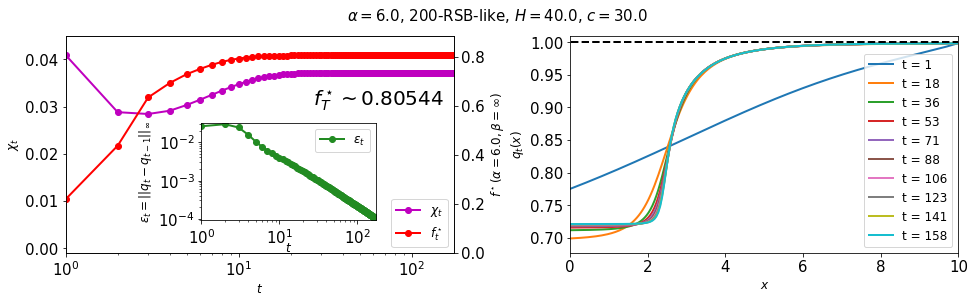

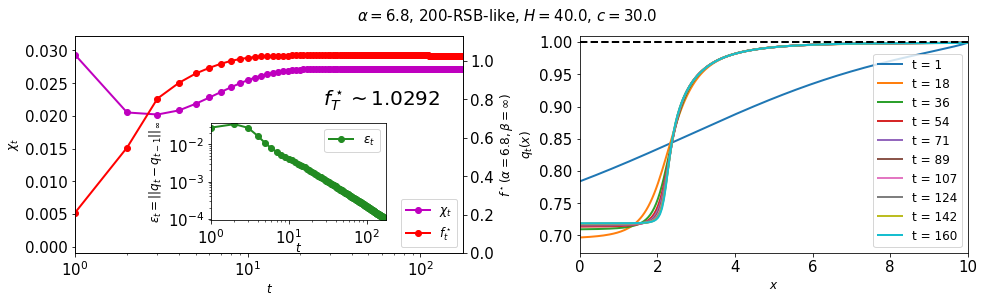

In [26]:
save = True
for alpha in [6., 6.8]:
    plot_chi_q(alpha, H = 40., c = 30., xmax = 10., k = 200, save = save)

# Plot: example of curves of $x \mapsto q(x)$

## Loading data

In [27]:
ks = [30, 50, 100, 200]
xmaxs = [10., 15.]
Hs = [40.]
cs = [30.]

alphas, estars, chis, qs, xs = np.full((np.size(ks), np.size(xmaxs), np.size(Hs), np.size(cs)), fill_value = None), np.full((np.size(ks), np.size(xmaxs), np.size(Hs), np.size(cs)), fill_value = None), np.full((np.size(ks), np.size(xmaxs), np.size(Hs), np.size(cs)), fill_value = None), np.full((np.size(ks), np.size(xmaxs), np.size(Hs), np.size(cs)), fill_value = None), np.full((np.size(ks), np.size(xmaxs), np.size(Hs), np.size(cs)), fill_value = None)

for (i_k,k) in enumerate(ks):
    for (i_x,xmax) in enumerate(xmaxs):
        for (i_H,H) in enumerate(Hs):
            for (i_c,c) in enumerate(cs):
                filename = f"Data/scan_alpha/FRSB_T0_GPU_k_{k}_xmax_{xmax}_H_{H}_c_{c}.pkl"
                infile = open(filename,'rb')
                results = pickle.load(infile)
                infile.close()
                chis[i_k,i_x,i_H,i_c] = results['chis']
                estars[i_k,i_x,i_H,i_c] = results['estars']
                xs[i_k,i_x,i_H,i_c] = results['xs']
                qs[i_k,i_x,i_H,i_c] = results['qs']
                alphas[i_k,i_x,i_H,i_c] = results['alphas']

## Make the plot

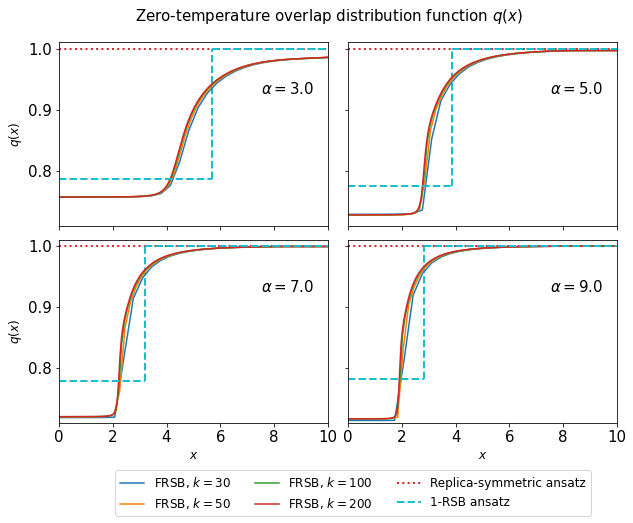

In [28]:
#The plots for q(x)
alphas_to_show = [3., 5., 7., 9.] #They are all in the list above

fig, axes = plt.subplots(2, 2,figsize = (10, 7), sharex=True, sharey=True)
for (i, alpha) in enumerate(alphas_to_show):
    ax = axes[i//2][i%2]
    for (i_k, k) in enumerate(ks):
        indices = i_k, 0, 0, 0 #We plot k, xmax = 10, H = 40, c = 30
        if alpha in alphas[indices]:
            i_alpha_FRSB = np.where(alphas[indices]==alpha)[0][0]
            ax.plot(xs[indices], qs[indices][i_alpha_FRSB], linewidth=1.5, label=r'FRSB, $k = {0}$'.format(k), zorder = 1) #We used the same list of xs for all alphas
    i_alpha_RS = np.abs(alphas_RS-alpha).argmin()
    ax.plot([0, 10], [1, 1], ':', linewidth=2, label=r'Replica-symmetric ansatz', zorder = 0, color = colors[3])
    
    i_alpha_1RSB = np.abs(alphas_1RSB-alpha).argmin()
    ax.plot([0, chims_1RSB[i_alpha_1RSB]], [q0s_1RSB[i_alpha_1RSB], q0s_1RSB[i_alpha_1RSB]], '--', linewidth=2, label=r'1-RSB ansatz', color = colors[9], zorder = 1)
    ax.plot([chims_1RSB[i_alpha_1RSB], 10], [1, 1], '--', linewidth=2, color = colors[9], zorder = 2)
    ax.plot([chims_1RSB[i_alpha_1RSB], chims_1RSB[i_alpha_1RSB]], [q0s_1RSB[i_alpha_1RSB], 1], '--', linewidth=2, color = colors[9], zorder = 0)
        
    if i // 2 == 1:
        ax.set_xlabel(r'$x$',fontsize=12)
    if i % 2 == 0:
        ax.set_ylabel(r'$q(x)$',fontsize=12)
    
    ax.set_xlim(0,10)
    ax.set_ylim(0.71, 1.01)
    ax.text(7.5, 0.925, r'$\alpha = {0}$'.format(alpha), fontsize = 15)
axes[0][0].legend(fontsize=12, loc = 'best', bbox_to_anchor = (2.,-1.3), ncol=3)
fig.suptitle('Zero-temperature overlap distribution function $q(x)$', y = 0.95, fontsize = 15)
plt.subplots_adjust(wspace=0.075, hspace = 0.075)
plt.savefig('../figures/overlap_function_T0.pdf', bbox_inches='tight')

# Plots: around the injectivity threshold

## Loading the data

In [30]:
ks = [30, 50, 100, 150, 200]
xmaxs = np.linspace(10, 15, num = 6, endpoint=True)
Hs = [40., 60.]
cs = [30.]

alphainjs = np.full((np.size(ks), np.size(xmaxs), np.size(Hs), np.size(cs)), fill_value = None) #Solution, and tolerance

for (i_k,k) in enumerate(ks):
    for (i_x, xmax) in enumerate(xmaxs):
        for (i_H, H) in enumerate(Hs):
            for (i_c, c) in enumerate(cs):
                filename = f"Data/thresholds/FRSB_T0_GPU_k_{k}_xmax_{xmax}_H_{H}_c_{c}.pkl"
                infile = open(filename,'rb')
                results = pickle.load(infile)
                infile.close()
                alphainjs[i_k,i_x,i_H,i_c] = results['alphainj_FRSB'], results['xtol']

## Plot: intervals for the injectivity threshold

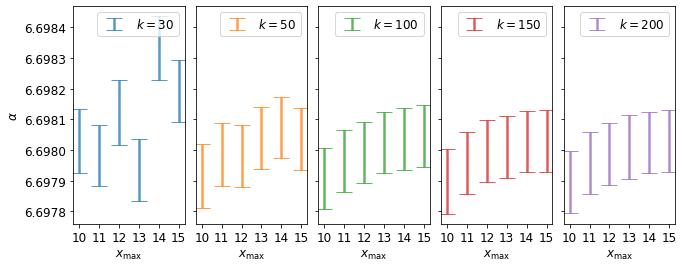

In [31]:
plt.rcParams.update({'font.size': 12})

#Ratio 
phi = (5/3)*((1 + np.sqrt(5.) ) /2.)
height = 4
fig, axes = plt.subplots(1, np.size(ks),figsize = (height*phi, height), sharey=True)

xmaxs_to_show = xmaxs
alphas_min, alphas_max = np.zeros((np.size(ks), np.size(xmaxs_to_show))) ,np.zeros((np.size(ks), np.size(xmaxs_to_show)))

for (i_k,k) in enumerate(ks):
    ax = axes[i_k]
    ax.set_xlabel(r'$x_{\mathrm{max}}$')
    if i_k == 0:
        ax.set_ylabel(r'$\alpha$')
    for (i_x, xmax) in enumerate(xmaxs_to_show):
        if all(x is None for x in alphainjs[i_k,i_x].flatten()):
            alphas_min[i_k,i_x], alphas_max[i_k,i_x] = np.inf, np.inf
        else:
            #We take the flattened array and remove the Nones
            flattened = alphainjs[i_k,i_x].flatten()
            flattened = flattened[flattened != None]
            #With the tolerance
            alphas_min[i_k,i_x], alphas_max[i_k,i_x] = np.amin([x[0]-x[1] for x in flattened]), np.amax([x[0]+x[1] for x in flattened])
    
    #Plot a confidence interval
    for (i_x, xmax) in enumerate(xmaxs_to_show): 
        if not(alphas_min[i_k,i_x]+alphas_max[i_k,i_x] == np.inf):
            eb = ax.errorbar(xmax, (alphas_min[i_k,i_x]+alphas_max[i_k,i_x])/2., yerr = (alphas_max[i_k,i_x]-alphas_min[i_k,i_x])/2, fmt = 'o', markersize = 0, ecolor = colors[i_k], elinewidth = 2.5, capsize = 8, alpha = 0.75)
            eb[-1][0].set_linestyle('-')

    ax.set_xticks(xmaxs_to_show)
    ax.set_xlim(np.amin(xmaxs_to_show)-0.3, np.amax(xmaxs_to_show)+0.3)
    a_min, a_max = np.amin(alphas_min[alphas_min != np.inf]), np.amax(alphas_max[alphas_max != np.inf])
    ax.set_ylim(a_min - 0.05*(a_max - a_min), a_max + 0.05*(a_max - a_min))

    eb = ax.errorbar(-1, -1, yerr = 1, fmt = 'o', markersize = 0, ecolor = colors[i_k], elinewidth = 2.5, capsize = 8, alpha = 0.75, label = r'$k = {0}$'.format(k))
    eb[-1][0].set_linestyle('-')
    ax.legend(loc = 'upper right')
plt.subplots_adjust(wspace=0.1)

plt.savefig('../figures/alpha_inj_summary.pdf', bbox_inches='tight')

In [32]:
#For k = 200 and xmax = 15, the boundaries of the confidence interval.
print(f"Min = {alphas_min[-1,-1]}")
print(f"Max = {alphas_max[-1,-1]}")

Min = 6.697928993474142
Max = 6.698131345621609


# Calculation: the upper bound given by Gordon's "mesh" theorem

In [4]:
from scipy.optimize import root_scalar

def H(p):
    return -p*np.log(p)-(1-p)*np.log(1-p)

#The function to minimize wrt 0 < t < 1
def to_min(t, alpha):
    return 2*alpha*H(1./alpha)/t + (2/t)*np.log((1+(1.-t)**(-1./2))/2)

#The derivative (wrt t) of the function to minimize (multiplied by - t^2)
def to_zero_t(t, alpha):
    return 1./np.sqrt(1.-t) - 1./(1.-t) + 2*alpha*H(1./alpha)+2*np.log((1+(1.-t)**(-1./2))/2)

def to_zero_alpha(alpha):
    #Find the minimum 
    sol = root_scalar(to_zero_t, bracket=[1e-5,1-1e-5], method='brentq', xtol = 1e-6, args = (alpha,))
    return (alpha/2. - 1.) - to_min(sol.root, alpha)

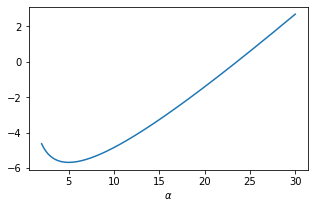

In [28]:
alphas = np.linspace(2, 30, num = 1000)
values = np.array([to_zero_alpha(alpha) for alpha in alphas])

fig, ax = plt.subplots(1, 1,figsize = (5,3))
ax.set_xlabel(r'$\alpha$')

ax.plot(alphas, values)

In [13]:
sol = root_scalar(to_zero_alpha, bracket=[2,30], method='brentq', xtol = 1e-6)
print(f"Gordon's mesh theorem upper bound on the injectivity threshold is {sol.root}")

Gordon's mesh theorem upper bound on the injectivity threshold is 23.539582748452002
